In [12]:
import pickle
from utils import create_features, print_classification_report, binarized_confusion_matrix, explain_weights
from sklearn_crfsuite import CRF
from IPython.display import display, HTML
import os
import gensim.models.keyedvectors as word2vec

### Loading the data

In [13]:
DATA_PATH = "./data/{}.pkl"

with open(DATA_PATH.format("train"), "rb") as f:
    train = pickle.load(f)
    
with open(DATA_PATH.format("test"), "rb") as f:
    test = pickle.load(f)

train[0][:5]

[('Anybody', 'NN', 'OUT'),
 ('who', 'WP', 'OUT'),
 ('is', 'VBZ', 'OUT'),
 ('expecting', 'VBG', 'OUT'),
 ('a', 'DT', 'OUT')]

### Reading Pretrained Word2Vec Model

In [14]:
if os.path.exists("./data/GoogleNews-vectors-negative300.bin"):
    WORD2VEC = word2vec.KeyedVectors.load_word2vec_format(
        "./data/GoogleNews-vectors-negative300.bin",
        binary=True)
else:
    print("Pretrain Word2Vec model not found!")

### Baseline

In [15]:
X_train, y_train, X_test, y_test = create_features(train, test)

X_train[0][0]

2019-06-24 21:31:05.821786: Creating features for train set...
2019-06-24 21:31:08.214975: Getting labels for train set...
2019-06-24 21:31:08.240613: Creating features for test set
2019-06-24 21:31:08.839116: Getting labels for test set...
2019-06-24 21:31:08.845997: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP'}

In [16]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.982     0.887     0.932       302
          IN      0.982     0.896     0.937       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.995     0.969     0.982      2111
   macro avg      0.988     0.928     0.956      2111
weighted avg      0.995     0.969     0.981      2111
 samples avg      0.998     0.985     0.987      2111



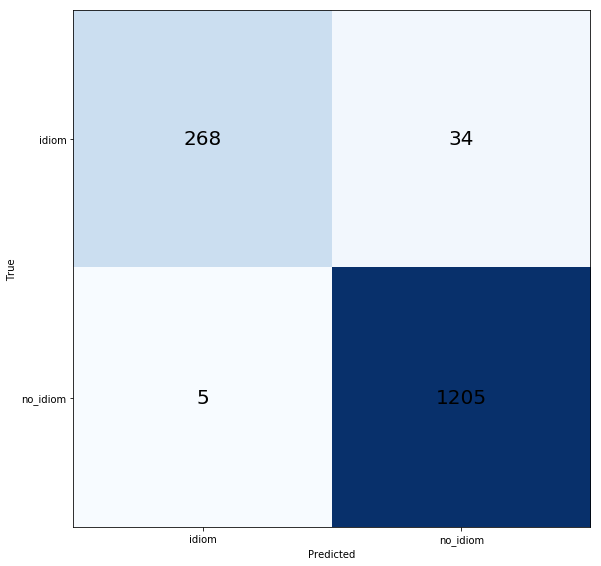

In [17]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PMI

In [18]:
X_train, y_train, X_test, y_test = create_features(train, test, include_PMI=True)

X_train[0][0]

2019-06-24 21:31:27.696161: Creating features for train set...
2019-06-24 21:31:39.770294: Getting labels for train set...
2019-06-24 21:31:39.793733: Creating features for test set
2019-06-24 21:31:42.331802: Getting labels for test set...
2019-06-24 21:31:42.336682: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:pmi': 2.17}

In [19]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)

predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.974     0.877     0.923       302
          IN      0.974     0.886     0.928       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.993     0.966     0.980      2111
   macro avg      0.983     0.921     0.950      2111
weighted avg      0.993     0.966     0.979      2111
 samples avg      0.997     0.984     0.986      2111



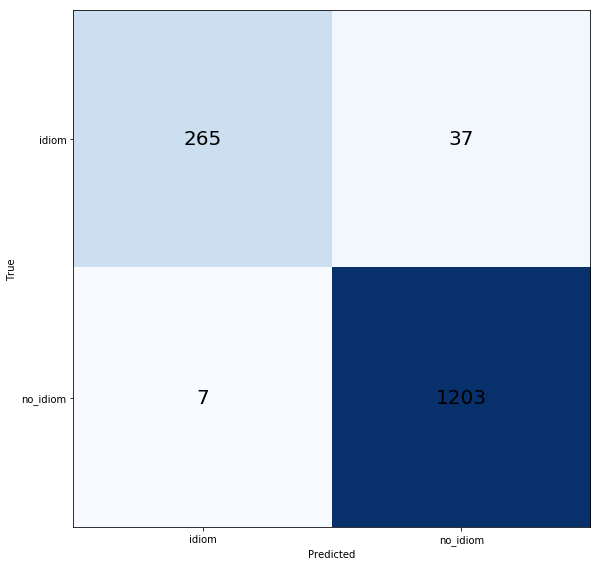

In [20]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PPMI

In [21]:
X_train, y_train, X_test, y_test = create_features(train, test, include_PPMI=True)

X_train[0][0]

2019-06-24 21:32:03.431594: Creating features for train set...
2019-06-24 21:32:11.633899: Getting labels for train set...
2019-06-24 21:32:11.651668: Creating features for test set
2019-06-24 21:32:14.220077: Getting labels for test set...
2019-06-24 21:32:14.228095: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17}

In [22]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.974     0.877     0.923       302
          IN      0.974     0.886     0.928       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.993     0.966     0.980      2111
   macro avg      0.983     0.921     0.950      2111
weighted avg      0.993     0.966     0.979      2111
 samples avg      0.997     0.984     0.986      2111



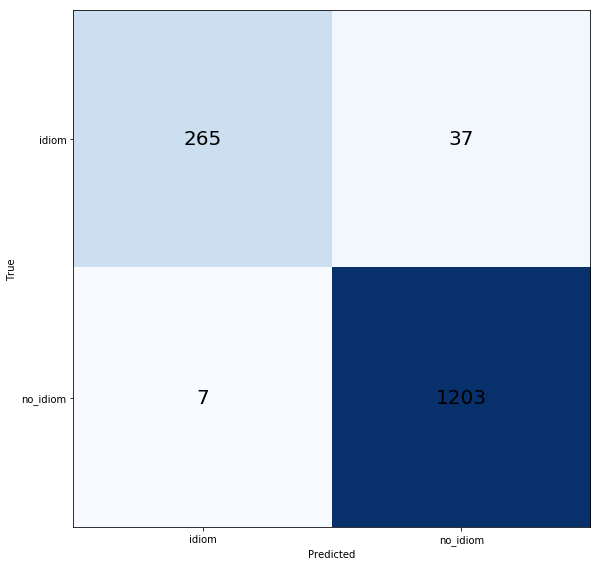

In [23]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec

In [24]:
X_train, y_train, X_test, y_test = create_features(train, test, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 21:32:36.794152: Creating features for train set...
2019-06-24 21:32:51.556061: Getting labels for train set...
2019-06-24 21:32:51.584056: Creating features for test set
2019-06-24 21:32:55.682537: Getting labels for test set...
2019-06-24 21:32:55.690713: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:word2vec': 0.311652}

In [25]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.971     0.891     0.929       302
          IN      0.971     0.899     0.934       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.992     0.970     0.981      2111
   macro avg      0.981     0.930     0.954      2111
weighted avg      0.992     0.970     0.981      2111
 samples avg      0.996     0.986     0.987      2111



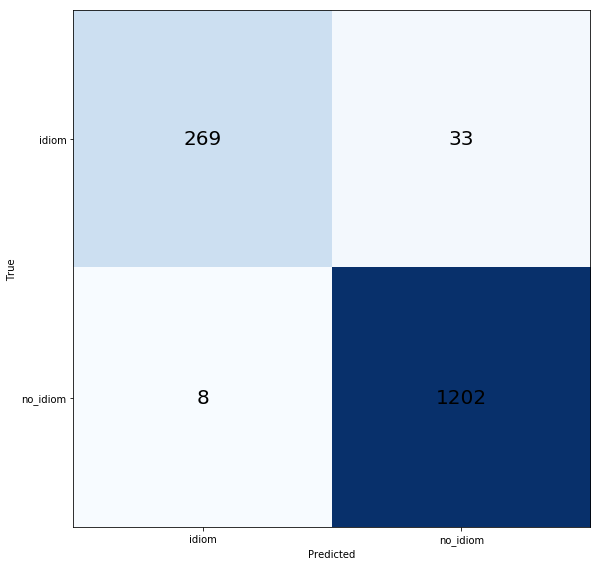

In [26]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec and PPMI

In [27]:
X_train, y_train, X_test, y_test = create_features(train, test, include_PPMI=True, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 21:33:18.668979: Creating features for train set...
2019-06-24 21:33:41.746413: Getting labels for train set...
2019-06-24 21:33:41.768359: Creating features for test set
2019-06-24 21:33:46.086844: Getting labels for test set...
2019-06-24 21:33:46.093789: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+1:word2vec': 0.311652}

In [28]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.964     0.897     0.930       302
          IN      0.964     0.906     0.934       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.990     0.972     0.981      2111
   macro avg      0.976     0.934     0.955      2111
weighted avg      0.990     0.972     0.981      2111
 samples avg      0.996     0.987     0.987      2111



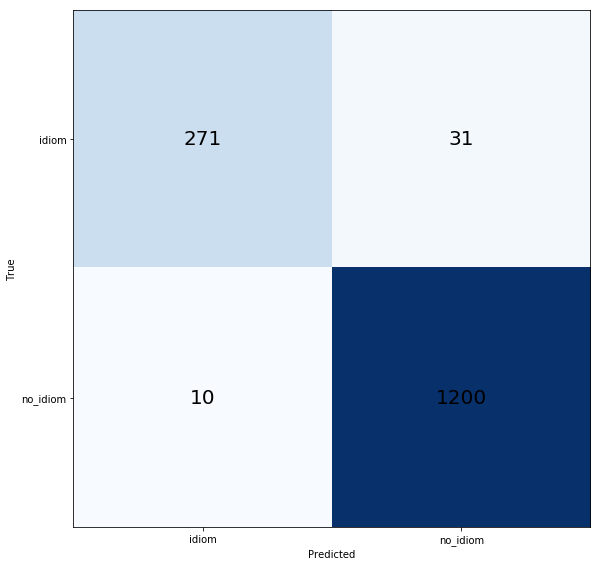

In [29]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Basic Features, 2 words ahead/behind

In [30]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2)

X_train[0][0]

2019-06-24 21:34:08.363205: Creating features for train set...
2019-06-24 21:34:12.243860: Getting labels for train set...
2019-06-24 21:34:12.265770: Creating features for test set
2019-06-24 21:34:13.270125: Getting labels for test set...
2019-06-24 21:34:13.277066: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB'}

In [31]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)


              precision    recall  f1-score   support

       BEGIN      0.986     0.937     0.961       302
          IN      0.986     0.943     0.964       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.996     0.983     0.990      2111
   macro avg      0.991     0.960     0.975      2111
weighted avg      0.996     0.983     0.989      2111
 samples avg      0.998     0.992     0.993      2111



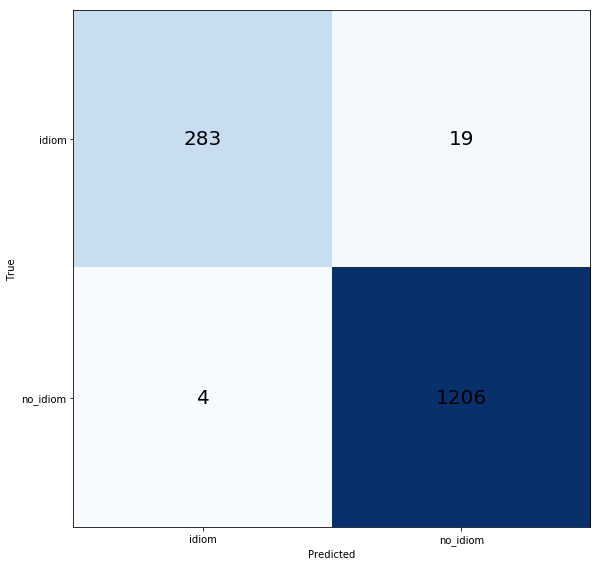

In [32]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PPMI, 2 words ahead/behind

In [33]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2, include_PPMI=True)

X_train[0][0]

2019-06-24 21:34:44.739075: Creating features for train set...
2019-06-24 21:35:04.071995: Getting labels for train set...
2019-06-24 21:35:04.094894: Creating features for test set
2019-06-24 21:35:08.901351: Getting labels for test set...
2019-06-24 21:35:08.918921: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35}

In [34]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)




              precision    recall  f1-score   support

       BEGIN      0.986     0.940     0.963       302
          IN      0.986     0.943     0.964       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.996     0.983     0.990      2111
   macro avg      0.991     0.961     0.976      2111
weighted avg      0.996     0.983     0.990      2111
 samples avg      0.998     0.992     0.993      2111



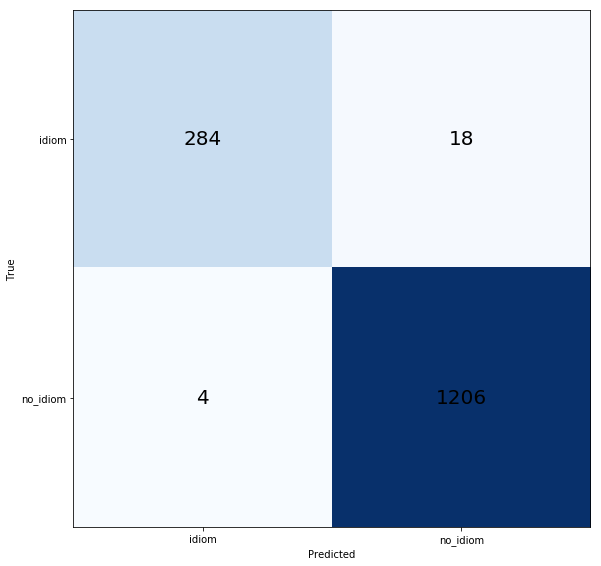

In [35]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec, 2 words ahead/behind

In [36]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 21:35:42.771376: Creating features for train set...
2019-06-24 21:36:07.721123: Getting labels for train set...
2019-06-24 21:36:07.747617: Creating features for test set
2019-06-24 21:36:15.097094: Getting labels for test set...
2019-06-24 21:36:15.107841: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:word2vec': 0.311652,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:word2vec': 0.2359705}

In [37]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.986     0.940     0.963       302
          IN      0.986     0.939     0.962       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.996     0.983     0.990      2111
   macro avg      0.991     0.960     0.975      2111
weighted avg      0.996     0.983     0.989      2111
 samples avg      0.998     0.992     0.993      2111



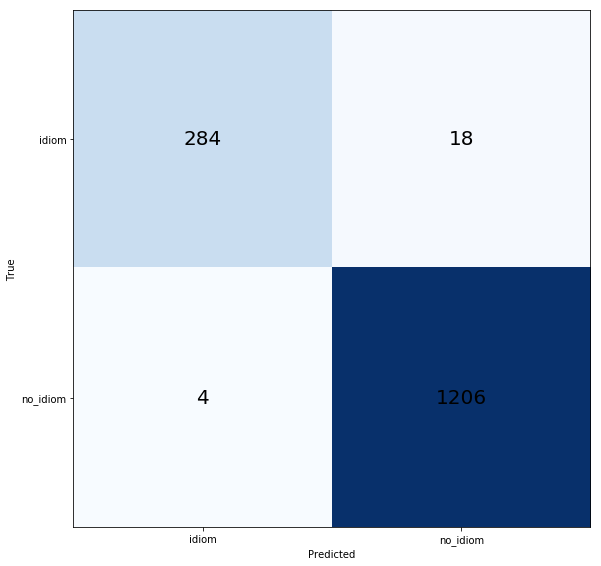

In [38]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec and PPMI, 2 words ahead/behind

In [39]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=2, include_PPMI=True, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 21:36:51.587300: Creating features for train set...
2019-06-24 21:37:33.835754: Getting labels for train set...
2019-06-24 21:37:33.879035: Creating features for test set
2019-06-24 21:37:43.564253: Getting labels for test set...
2019-06-24 21:37:43.572421: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+1:word2vec': 0.311652,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35,
 '+2:word2vec': 0.2359705}

In [40]:

crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)


              precision    recall  f1-score   support

       BEGIN      0.986     0.940     0.963       302
          IN      0.986     0.946     0.966       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.996     0.984     0.990      2111
   macro avg      0.991     0.962     0.976      2111
weighted avg      0.996     0.984     0.990      2111
 samples avg      0.998     0.992     0.993      2111



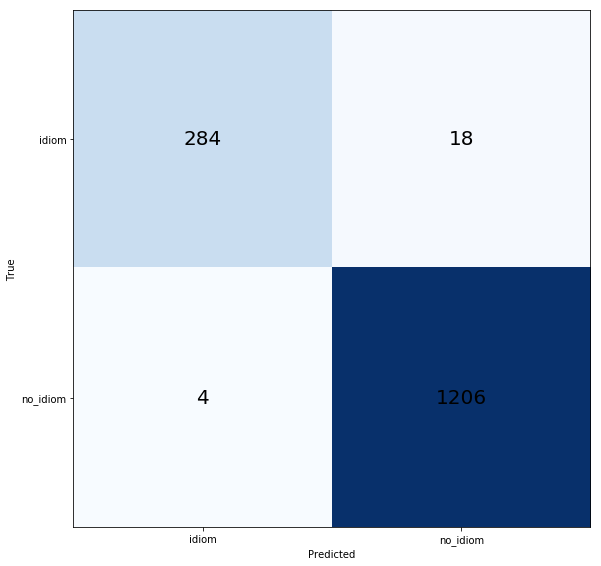

In [41]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Basic Features, 3 words ahead/behind

In [42]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=3)

X_train[0][0]

2019-06-24 21:38:21.237125: Creating features for train set...
2019-06-24 21:38:26.436716: Getting labels for train set...
2019-06-24 21:38:26.470663: Creating features for test set
2019-06-24 21:38:27.816373: Getting labels for test set...
2019-06-24 21:38:27.827358: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+3:word.lower()': 'expecting',
 '+3:word.istitle()': False,
 '+3:word.isupper()': False,
 '+3:postag': 'VBG',
 '+3:postag[:2]': 'VB'}

In [43]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.993     0.937     0.964       302
          IN      0.993     0.936     0.964       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.998     0.982     0.990      2111
   macro avg      0.995     0.958     0.976      2111
weighted avg      0.998     0.982     0.990      2111
 samples avg      0.999     0.992     0.993      2111



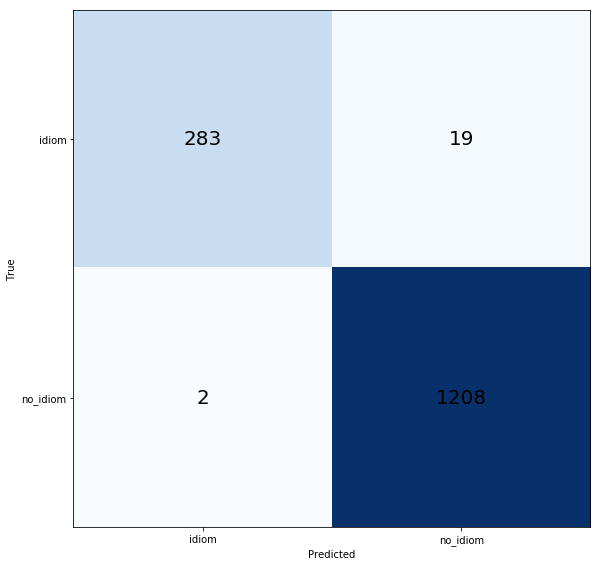

In [44]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### PPMI, 3 words ahead/behind

In [45]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=3, include_PPMI=True)

X_train[0][0]

2019-06-24 21:39:07.722967: Creating features for train set...
2019-06-24 21:39:37.349226: Getting labels for train set...
2019-06-24 21:39:37.377054: Creating features for test set
2019-06-24 21:39:44.799715: Getting labels for test set...
2019-06-24 21:39:44.832997: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35,
 '+3:word.lower()': 'expecting',
 '+3:word.istitle()': False,
 '+3:word.isupper()': False,
 '+3:postag': 'VBG',
 '+3:postag[:2]': 'VB',
 '+3:ppmi': 0}

In [46]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.989     0.934     0.961       302
          IN      0.989     0.933     0.960       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.997     0.981     0.989      2111
   macro avg      0.993     0.955     0.974      2111
weighted avg      0.997     0.981     0.989      2111
 samples avg      0.999     0.991     0.992      2111



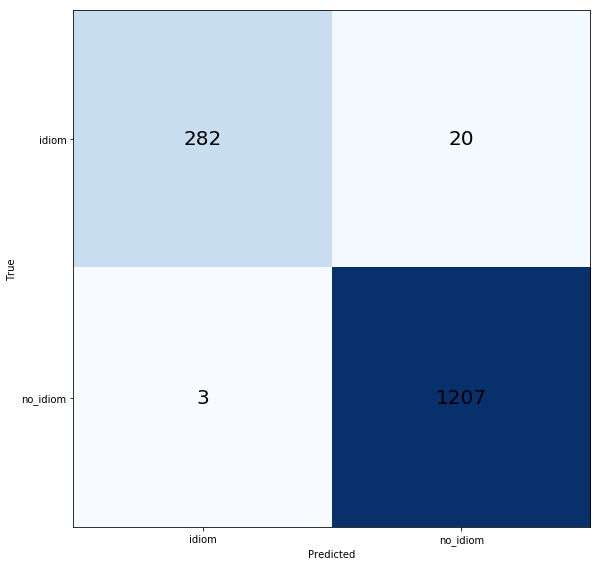

In [47]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec, 3 words ahead/behind

In [48]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=3, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 21:40:42.005587: Creating features for train set...
2019-06-24 21:41:26.727799: Getting labels for train set...
2019-06-24 21:41:26.756931: Creating features for test set
2019-06-24 21:41:38.197225: Getting labels for test set...
2019-06-24 21:41:38.218804: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:word2vec': 0.311652,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:word2vec': 0.2359705,
 '+3:word.lower()': 'expecting',
 '+3:word.istitle()': False,
 '+3:word.isupper()': False,
 '+3:postag': 'VBG',
 '+3:postag[:2]': 'VB',
 '+3:word2vec': 0.22183287}

In [49]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)

              precision    recall  f1-score   support

       BEGIN      0.993     0.937     0.964       302
          IN      0.993     0.936     0.964       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.998     0.982     0.990      2111
   macro avg      0.995     0.958     0.976      2111
weighted avg      0.998     0.982     0.990      2111
 samples avg      0.999     0.992     0.993      2111



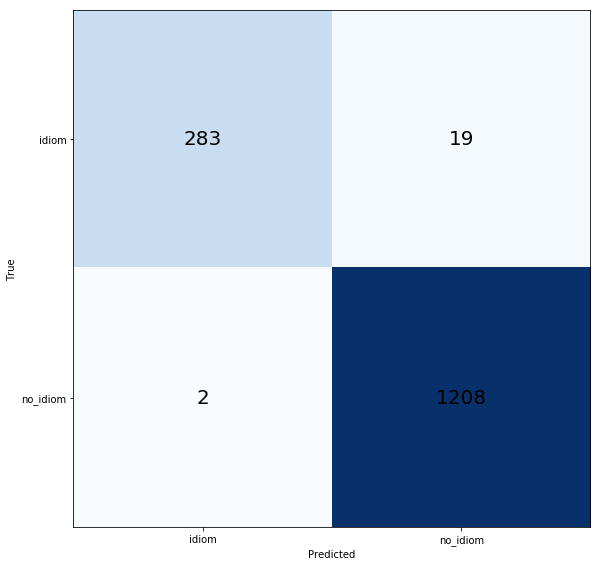

In [50]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)

### Word2Vec and PPMI, 3 words ahead/behind

In [51]:
X_train, y_train, X_test, y_test = create_features(train, test, dist=3, include_PPMI=True, word2vec=WORD2VEC)

X_train[0][0]

2019-06-24 21:42:32.406566: Creating features for train set...
2019-06-24 21:43:44.679743: Getting labels for train set...
2019-06-24 21:43:44.714236: Creating features for test set
2019-06-24 21:44:02.455958: Getting labels for test set...
2019-06-24 21:44:02.473786: Finished!


{'bias': 1.0,
 'word.lower()': 'anybody',
 'word[-3:]': 'ody',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'postag': 'NN',
 'postag[:2]': 'NN',
 'BOS': True,
 '+1:word.lower()': 'who',
 '+1:word.istitle()': False,
 '+1:word.isupper()': False,
 '+1:postag': 'WP',
 '+1:postag[:2]': 'WP',
 '+1:ppmi': 2.17,
 '+1:word2vec': 0.311652,
 '+2:word.lower()': 'is',
 '+2:word.istitle()': False,
 '+2:word.isupper()': False,
 '+2:postag': 'VBZ',
 '+2:postag[:2]': 'VB',
 '+2:ppmi': 0.35,
 '+2:word2vec': 0.2359705,
 '+3:word.lower()': 'expecting',
 '+3:word.istitle()': False,
 '+3:word.isupper()': False,
 '+3:postag': 'VBG',
 '+3:postag[:2]': 'VB',
 '+3:ppmi': 0,
 '+3:word2vec': 0.22183287}

In [52]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False,
)

crf.fit(X_train, y_train)


predictions = crf.predict(X_test)


              precision    recall  f1-score   support

       BEGIN      0.990     0.937     0.963       302
          IN      0.989     0.936     0.962       297
         OUT      1.000     1.000     1.000      1512

   micro avg      0.997     0.982     0.989      2111
   macro avg      0.993     0.958     0.975      2111
weighted avg      0.997     0.982     0.989      2111
 samples avg      0.999     0.992     0.993      2111



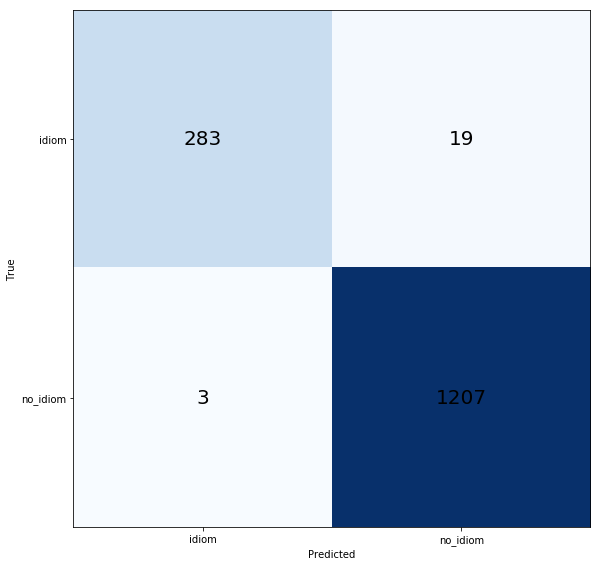

In [53]:
display(explain_weights(crf, html=True))
print_classification_report(predictions, y_test)
binarized_confusion_matrix(predictions, y_test)